<a href="https://colab.research.google.com/github/RajezMariner/Deep_Learning/blob/master/Exercise_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.text import *

In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [ ]:
path

PosixPath('/root/.fastai/data/imdb_sample')

In [ ]:
df = pd.read_csv(path/'texts.csv')
df.head(5)

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [ ]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [ ]:
data_lm.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [ ]:
data_lm.batch_size

64

In [ ]:
TextDataBunch.from_csv??

In [ ]:
data_lm1 = TextLMDataBunch.from_csv(path, 'texts.csv')

In [ ]:
data_lm1.show_batch()

idx,text
0,"xxunk of the characters can partly be credited to just great art , with individual personalities creating clear and endearing xxunk among the characters . xxmaj consequently , it is extremely easy to become to drawn to any particular character . xxmaj personally , i liked xxmaj xxunk because of his xxunk personality . xxmaj while i may be biased with a sentimental xxunk of this show to my childhood"
1,"the communist censorship . xxmaj this all is very good , but look carefully : xxup he xxup does xxup not xxup know xxup his xxup job ! xxmaj the scenes are unbalanced , without proper start and and , with a xxunk content and full of emptiness . xxmaj he has nothing to say about the subject , so he over - xxunk with violence , nakedness and gutter"
2,"xxmaj when xxmaj fred unexpectedly showed up in the xxmaj french town where xxmaj jimmy , now fully recovered from his wounds , was xxunk at things got very xxunk for both him and xxmaj rose who had already accepted xxmaj jimmy 's proposal of marriage to her ! \n \n xxmaj with xxup wwi over and xxmaj jimmy marrying xxmaj rose left xxmaj fred , who 's still"
3,"one she was forced to play . xxmaj the latter role , which seemed to most actresses as xxunk , career destroying role , was the one she fought for xxunk for months . xxmaj and it was the latter role that xxunk her among the greatest stars . xxmaj so there is no question that xxmaj ms xxmaj davis knew from the start what she was doing . \n"
4,"than xxunk this causes a little loss of sleep , maybe it xxunk take my word for it , investigate for yourselves . xxbos xxmaj to say this film is simply a xxunk of xxmaj catholics and a xxunk of history is xxunk . xxmaj that is not what this film is . \n \n xxmaj what this film is is a comment on the abuses of the xxmaj"


In [ ]:
data_lm.save()

In [ ]:
data = load_data(path)

In [ ]:
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [ ]:
del data

In [ ]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')

In [ ]:
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


In [ ]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [ ]:
data.train_ds[0][0]

Text [  2  13 487  12 ...  41 257 445  10]

In [ ]:
data = TextList.from_csv(path, 'texts.csv', cols='text').split_from_df(col=2).label_from_df(cols=0).databunch()

In [ ]:
data.

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj xxunk",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",positive


In [ ]:
path = untar_data(URLs.IMDB)

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/imdb/data_lm.pkl'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/models'),
 PosixPath('/root/.fastai/data/imdb/README')]

In [ ]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

In [ ]:
bs=64
data = TextList.from_folder(path)

In [ ]:
data = data.filter_by_folder(include=['text','train','sup'])

In [ ]:
data = data.split_by_rand_pct(0.1)

In [ ]:
data = data.label_for_lm().databunch()

In [ ]:
data.save('data_lm.pkl')

In [ ]:
# del data
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [ ]:
data_lm.show_batch()

idx,text
0,uncomfortable to watch . xxmaj normally i 'm enthusiastic about modern re - tellings if they are treated well . xxmaj usually it 's interesting to see the parallels between the past and present within a familiar story . xxmaj unfortunately this movie was less of a modern retelling and more of a pop culture perversion . xxmaj the adaptation of the original 's characters seemed juvenile and usually proved
1,"like the rest of it . xxmaj this one completely destroys the essence and uniqueness of the first one . xxmaj just shows itself up . \n \n xxmaj such a shame that xxmaj wes xxmaj craven created something so good in the beginning , yet it has to be dragged down because of this trash that belongs in the bin . xxmaj they should n't have even bothered"
2,like it was shot in their backyard with a xxup vhs camera . \n \n xxmaj the best shots are a shot of xxmaj superman catching a car in his hands . xxmaj and the final shot of xxmaj two - xxmaj face and xxmaj batman at the very end . xxmaj for those of you who have seen the trailer . xxmaj you know what i 'm talking
3,to the five girls ) and there is no violence to speak of ... just the sounds of screaming and crunching . xxmaj the whole film takes place inside a van which means decent scenery is out of the question . xxmaj the five girls really do their best with what they 've been given but on the whole come across as pretty terrible actresses ... although with the material
4,"- game and still losing ? i would think so ... \n \n xxmaj it even under delivers . xxmaj it should have made the first remake look like "" xxmaj the xxmaj fog "" remake ( which was less menacing than an episode of "" xxmaj becker "" ) . xxmaj more bad guys . xxmaj more time in the caves . xxmaj more tension . xxmaj more"


In [ ]:
# del learn
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
del data_lm

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


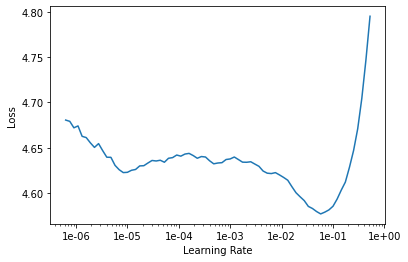

In [ ]:
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.071173,3.949203,0.296499,04:15


In [ ]:
learn.save('fit_head')

In [ ]:
language_learner = learn.load('fit_head')

In [ ]:
language_learner.unfreeze()

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
language_learner.fit_one_cycle(10, max_lr=1e-3, moms=(0.8, 0.9))

epoch,train_loss,valid_loss,accuracy,time
0,3.802212,3.846798,0.307966,04:58
1,3.756390,3.793648,0.314832,04:58
2,3.668462,3.762788,0.318809,04:58
3,3.580346,3.743200,0.321071,04:59
4,3.486498,3.739021,0.322546,04:58
5,3.340533,3.750260,0.322372,04:58
6,3.221156,3.765304,0.322114,04:58
7,3.114113,3.788606,0.320708,05:00
8,3.034345,3.808280,0.319632,04:59
9,3.010521,3.818498,0.318839,04:58


In [ ]:
language_learner.save('fine_tuned')

In [ ]:
text = 'What is my'
n_words = 20
sentence = 2
language_learner.predict(text, n_words, temperature=0.75)

'What is my point ? How did you want to see Billy Bob Thornton on the big screen ?'

In [ ]:
learn.save_encoder('fine_tuned_enc')

Text Classifier

In [ ]:
data = TextList.from_folder(path, vocab=data_lm.vocab).split_by_folder('test').label_from_folder(classes=['neg','pos']).databunch(bs=64)

In [ ]:
learn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.5)

In [ ]:
learn = learn.load_encoder('fine_tuned_enc')

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


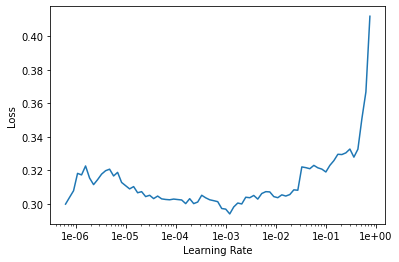

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

In [ ]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

In [ ]:
learn.predict("I really loved that movie, it was awesome!")

(Category tensor(1), tensor(1), tensor([0.0054, 0.9946]))

In [ ]:
learn.predict("I really hate it")

(Category tensor(1), tensor(1), tensor([0.3133, 0.6867]))

In [ ]:
learn.predict("fuck it")

(Category tensor(1), tensor(1), tensor([0.0380, 0.9620]))

In [ ]:
learn.predict("Wow")

(Category tensor(1), tensor(1), tensor([0.2300, 0.7700]))